# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, regularizers

In [ ]:
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
ds = pd.read_csv("/content/drive/MyDrive/PIAIC/assignment_resources/car_prediction/CarPrice_Assignment.csv")

In [ ]:
ds


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
ds.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
labelEncoder = LabelEncoder()

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
ds["fueltype"] = labelEncoder.fit_transform(ds["fueltype"])
ds["aspiration"] = labelEncoder.fit_transform(ds["aspiration"])
ds["carbody"] = labelEncoder.fit_transform(ds["carbody"])
ds["drivewheel"] = labelEncoder.fit_transform(ds["drivewheel"])
ds["enginelocation"] = labelEncoder.fit_transform(ds["enginelocation"])
ds["fuelsystem"] = labelEncoder.fit_transform(ds["fuelsystem"])

In [ ]:
ds["doornumber"] = ds["doornumber"].map({"two": 2, "four": 4})

In [ ]:
ds.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


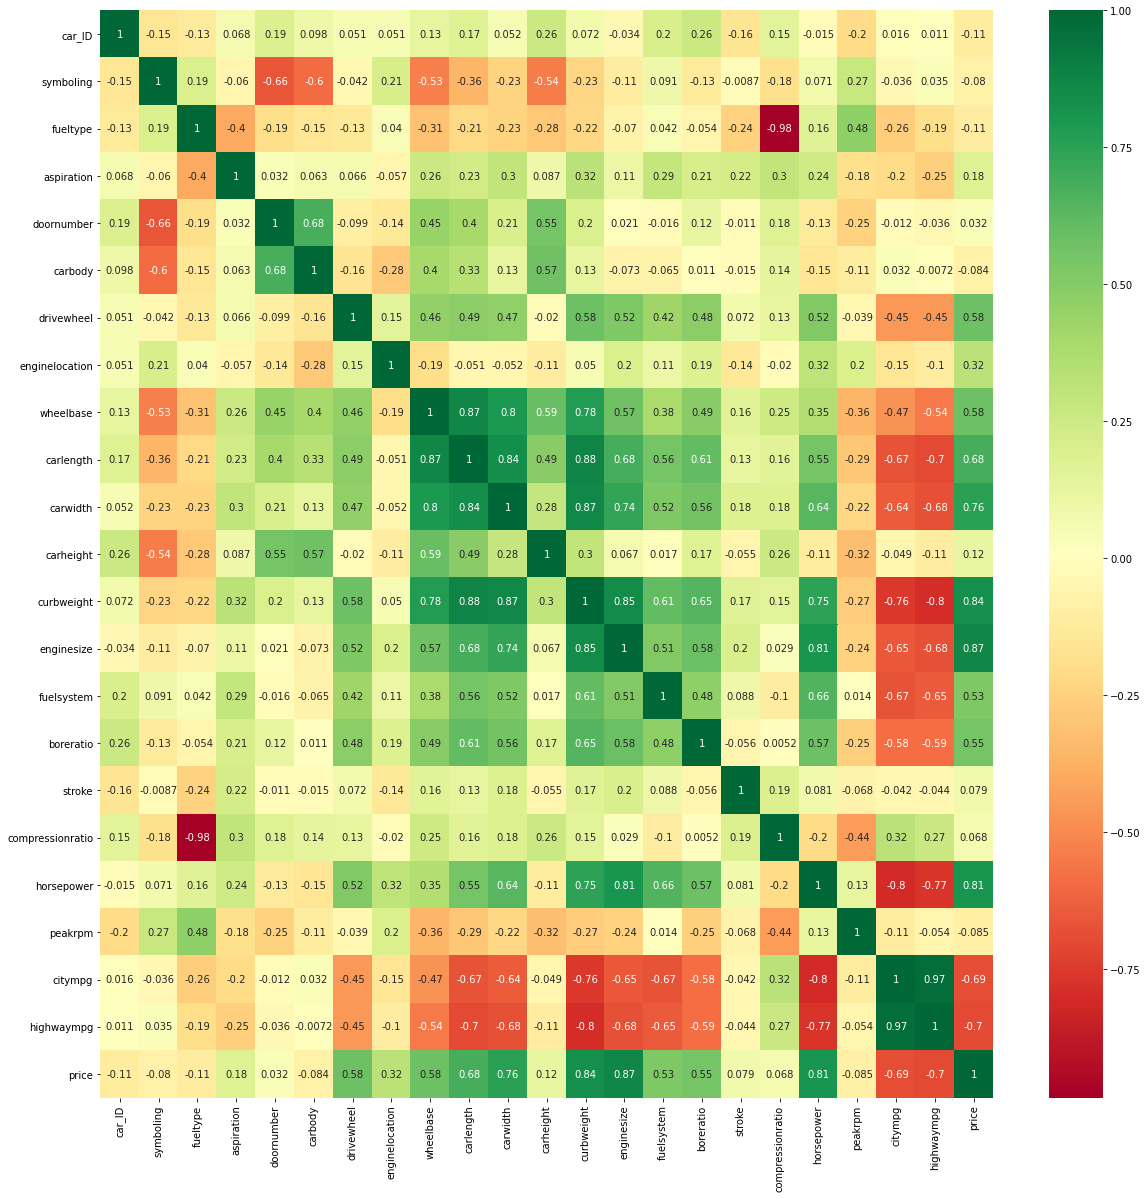

In [ ]:
corrmat = ds.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
g = sns.heatmap(ds[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [ ]:
data = ds[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength', 
           'wheelbase','drivewheel','enginelocation', 'citympg','highwaympg','price']]

In [ ]:
data

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,enginelocation,citympg,highwaympg,price
0,111,3.47,130,2548,64.1,168.8,88.6,2,0,21,27,13495.0
1,111,3.47,130,2548,64.1,168.8,88.6,2,0,21,27,16500.0
2,154,2.68,152,2823,65.5,171.2,94.5,2,0,19,26,16500.0
3,102,3.19,109,2337,66.2,176.6,99.8,1,0,24,30,13950.0
4,115,3.19,136,2824,66.4,176.6,99.4,0,0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,114,3.78,141,2952,68.9,188.8,109.1,2,0,23,28,16845.0
201,160,3.78,141,3049,68.8,188.8,109.1,2,0,19,25,19045.0
202,134,3.58,173,3012,68.9,188.8,109.1,2,0,18,23,21485.0
203,106,3.01,145,3217,68.9,188.8,109.1,2,0,26,27,22470.0


In [ ]:
x = data.drop(labels=["price"], axis=1)
y = data["price"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x_train = (x_train - x_train.mean(axis=0)) / x_train.std(axis=0)

In [ ]:
x_train.shape

(143, 11)

In [ ]:
y_train

177    11248.0
75     16503.0
174    10698.0
31      6855.0
12     20970.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 143, dtype: float64

In [ ]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation="relu",  input_shape=(11, )))
  model.add(layers.Dense(8, activation="relu"))
  model.add(layers.Dense(6, activation="relu"))
  model.add(layers.Dense(1))
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

In [ ]:
k = 4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores = []
all_mae_histories = []

for i in range(k):
  print("Processing fold#", i)
  x_val = x_train[i * num_val_samples: (i + 1) * num_val_samples]
  y_val = y_train[i * num_val_samples: (i + 1) * num_val_samples]
  x_train_partial = np.concatenate(
      [x_train[: i * num_val_samples],
       x_train[(i + 1) * num_val_samples:]],
       axis=0)
  y_train_partial = np.concatenate(
      [y_train[: i * num_val_samples],
       y_train[(i + 1) * num_val_samples:]],
       axis=0)

  network = build_model()
  history = network.fit(x_train_partial, y_train_partial, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=1)
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)
  val_mse, val_mae = network.evaluate(x_test, y_test)
  all_scores.append(val_mae)

Processing fold# 0
Epoch 1/100
108/108 [==============================] - 1s 3ms/step - loss: 236125754.4954 - mae: 13178.5596 - val_loss: 188446832.0000 - val_mae: 12303.9199
Epoch 2/100
108/108 [==============================] - 0s 1ms/step - loss: 216084270.7523 - mae: 12726.3947 - val_loss: 188401328.0000 - val_mae: 12301.7822
Epoch 3/100
108/108 [==============================] - 0s 2ms/step - loss: 248765709.7982 - mae: 13386.8162 - val_loss: 188324608.0000 - val_mae: 12298.1279
Epoch 4/100
108/108 [==============================] - 0s 2ms/step - loss: 181630069.1376 - mae: 11934.0737 - val_loss: 188191808.0000 - val_mae: 12291.9639
Epoch 5/100
108/108 [==============================] - 0s 1ms/step - loss: 313325797.8716 - mae: 15451.4491 - val_loss: 188006208.0000 - val_mae: 12283.1514
Epoch 6/100
108/108 [==============================] - 0s 1ms/step - loss: 263606505.9083 - mae: 13619.2556 - val_loss: 187718800.0000 - val_mae: 12269.4287
Epoch 7/100
108/108 [==================

In [ ]:
average_mae_history = [
                       np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

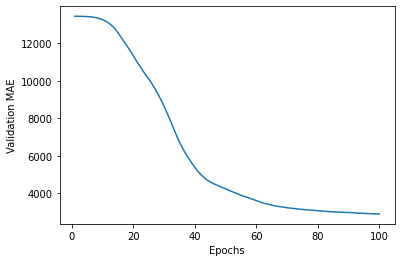

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
all_scores

[5014675.5, 4500417.0, 3968950.25, 4203311.0]

In [ ]:
np.mean(all_scores)

4421838.4375